<a href="https://colab.research.google.com/github/Cing2PO/Prediksi-Harga-Kamera/blob/main/RandomForest_Kamera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok

*   Rizki Ahmad Gufron 2304130056
*   Ilham Putra AM 2304130084
*   Alan Aditya 2304130087

# IMPORT LIBRARY DAN DATASET

In [1]:
import pandas as pd #dataframe
import numpy as np #olah angka
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
from scipy.stats import zscore #mencari outlier
from sklearn.model_selection import train_test_split #split dataset untuk ditrainig
from sklearn.ensemble import RandomForestRegressor #model training
from sklearn.metrics import mean_squared_error, r2_score #mengecek akurasi
from sklearn.preprocessing import OneHotEncoder #training model
from sklearn.preprocessing import LabelEncoder #encode non angka menjadi angka
from sklearn.compose import ColumnTransformer #training model
from sklearn.pipeline import Pipeline #training model
import pickle # untuk menyimpan model
import joblib  # Untuk memuat model yang sudah dilatih

In [2]:
url = 'https://raw.githubusercontent.com/Cing2PO/Prediksi-harga-laptop-randomforest/refs/heads/main/dataset/camera_dataset.csv'
data = pd.read_csv(url)
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max resolution           1038 non-null   float64
 3   Low resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal focus range       1038 non-null   float64
 8   Macro focus range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


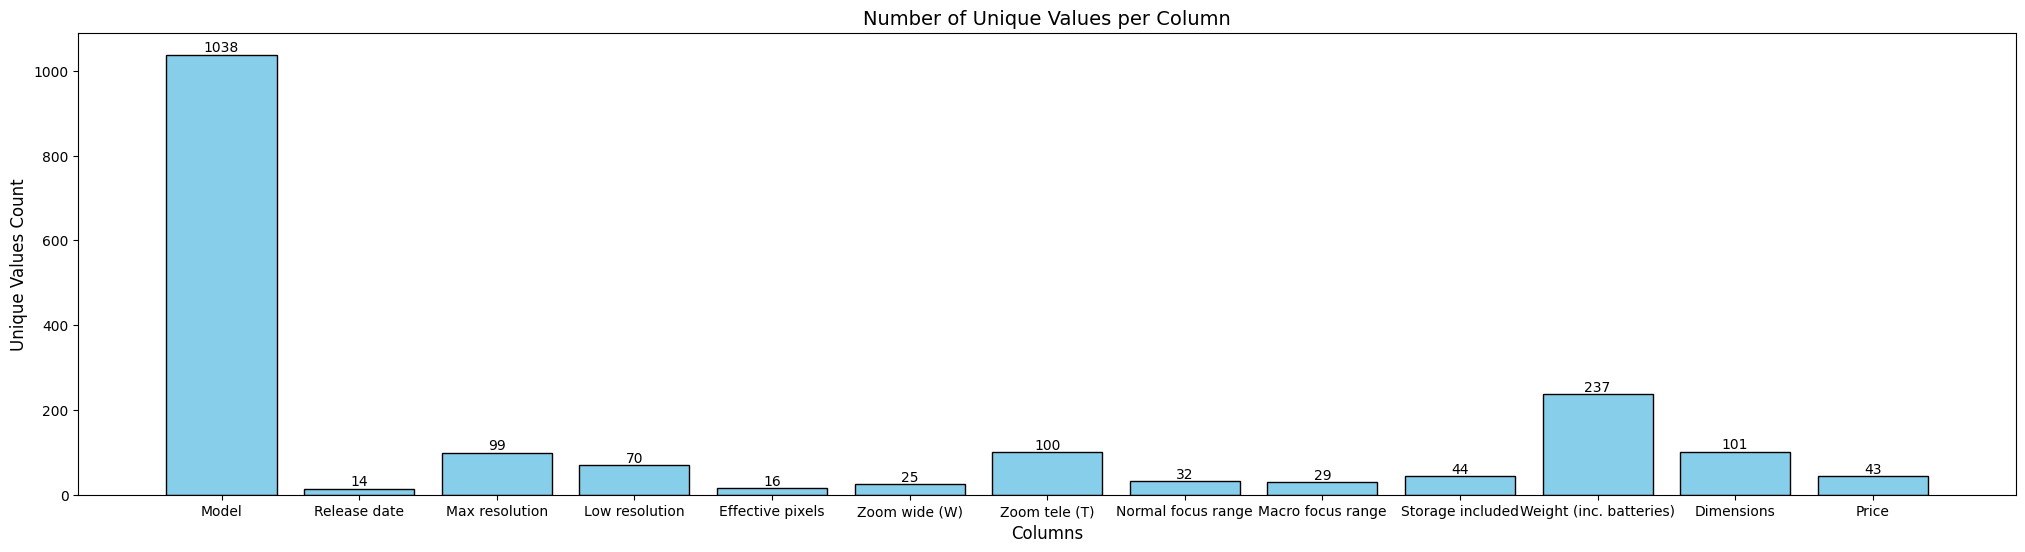

In [4]:
# Hitung jumlah nilai unik pada setiap kolom
nunique_counts = data.nunique()

# Buat Diagram Batang
plt.figure(figsize=(25, 6))
bars = plt.bar(nunique_counts.index, nunique_counts, color='skyblue', edgecolor='black')

# Tambahkan Legenda
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, str(int(height)),
             ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Number of Unique Values per Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Unique Values Count', fontsize=12)

# Tampilkan Grafik
plt.show()

# PRE-PROCESSING

In [5]:
#mengganti model dengan nama brand saja
data['Model'] = data['Model'].apply(lambda x: x.split()[0])
data['Release date'] = data['Release date'].astype(object)
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [6]:
#mengecek mean setiap kolom
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    mean_value = round(data[col].mean(), 2)
    print(f"Mean dari kolom '{col}': {mean_value}")

Mean dari kolom 'Max resolution': 2474.67
Mean dari kolom 'Low resolution': 1773.94
Mean dari kolom 'Effective pixels': 4.6
Mean dari kolom 'Zoom wide (W)': 32.96
Mean dari kolom 'Zoom tele (T)': 121.53
Mean dari kolom 'Normal focus range': 44.15
Mean dari kolom 'Macro focus range': 7.79
Mean dari kolom 'Storage included': 17.45
Mean dari kolom 'Weight (inc. batteries)': 319.27
Mean dari kolom 'Dimensions': 105.36
Mean dari kolom 'Price': 457.38


In [7]:
#mengecek modus setiap kolom
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    # Menghitung modus
    mode_value = data[col].mode()[0]
    print(f"Modus dari kolom '{col}': {mode_value}")

Modus dari kolom 'Max resolution': 3072.0
Modus dari kolom 'Low resolution': 2048.0
Modus dari kolom 'Effective pixels': 3.0
Modus dari kolom 'Zoom wide (W)': 38.0
Modus dari kolom 'Zoom tele (T)': 114.0
Modus dari kolom 'Normal focus range': 50.0
Modus dari kolom 'Macro focus range': 10.0
Modus dari kolom 'Storage included': 16.0
Modus dari kolom 'Weight (inc. batteries)': 320.0
Modus dari kolom 'Dimensions': 90.0
Modus dari kolom 'Price': 149.0


In [8]:
# Loop untuk mengecek modus dan median dari setiap kolom
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    # Menghitung median
    median_value = round(data[col].median(), 2)
    print(f"Median dari kolom '{col}': {median_value}")

Median dari kolom 'Max resolution': 2560.0
Median dari kolom 'Low resolution': 2048.0
Median dari kolom 'Effective pixels': 4.0
Median dari kolom 'Zoom wide (W)': 36.0
Median dari kolom 'Zoom tele (T)': 108.0
Median dari kolom 'Normal focus range': 50.0
Median dari kolom 'Macro focus range': 6.0
Median dari kolom 'Storage included': 16.0
Median dari kolom 'Weight (inc. batteries)': 226.0
Median dari kolom 'Dimensions': 101.0
Median dari kolom 'Price': 199.0


## MENGHILANGKAN OUTLIER

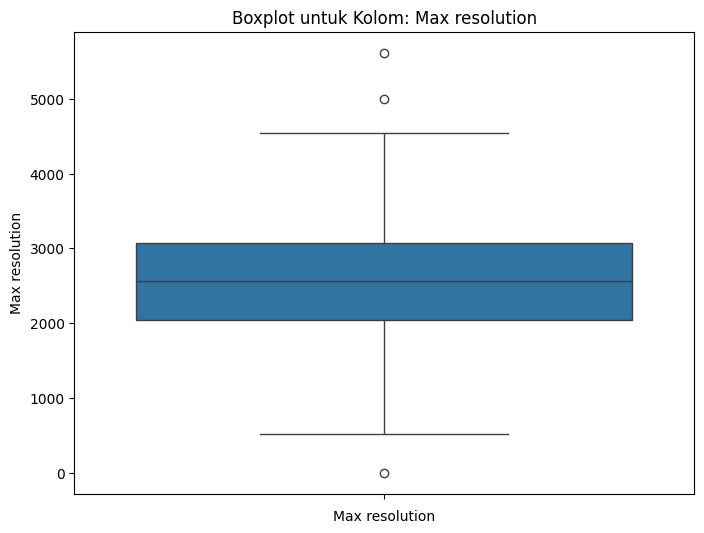

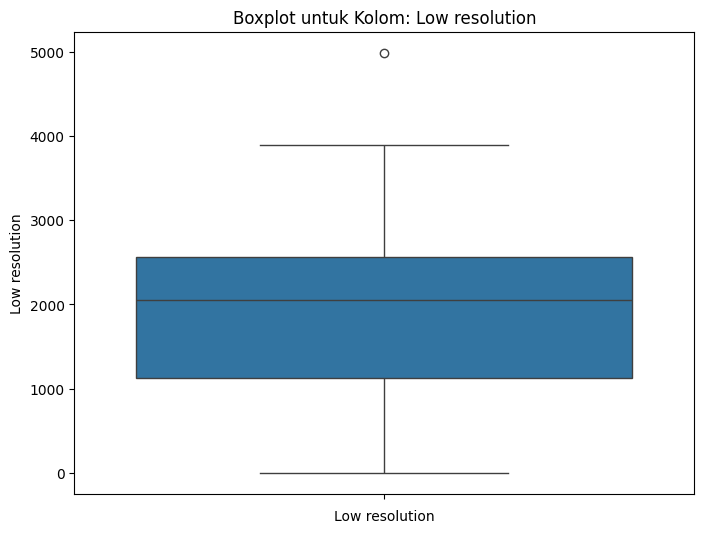

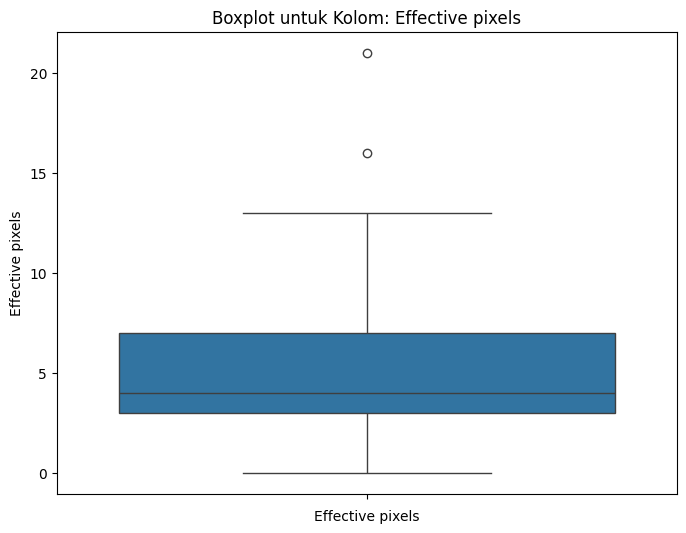

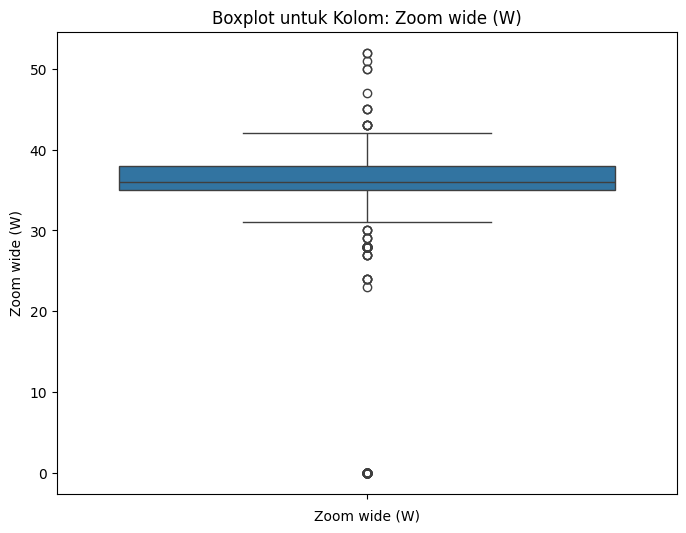

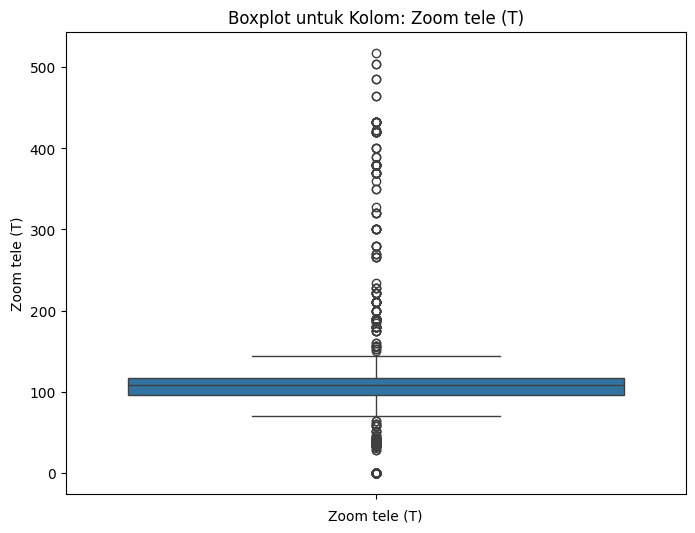

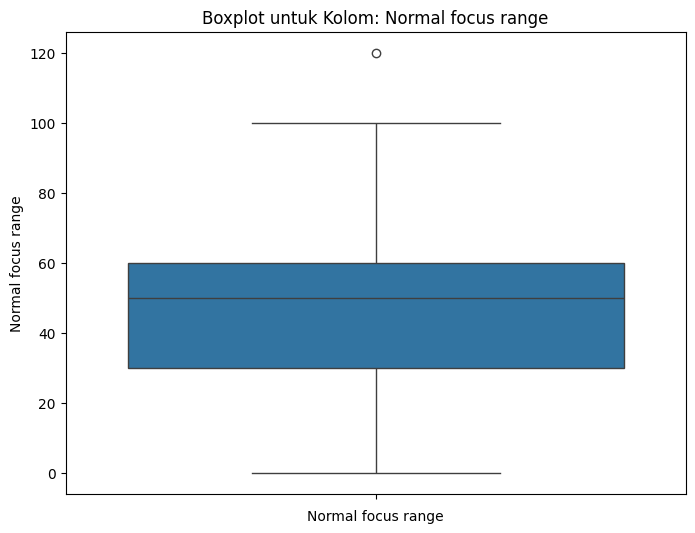

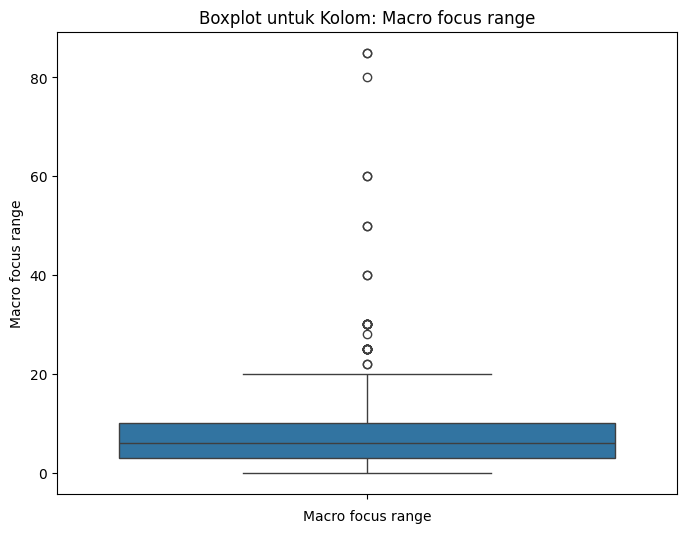

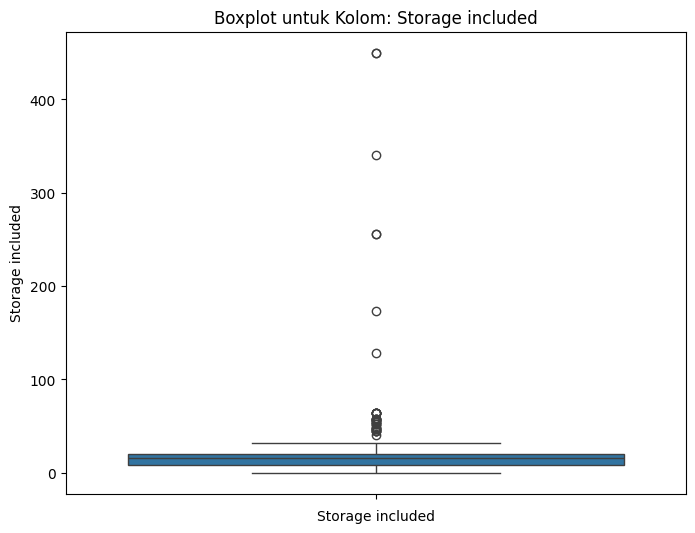

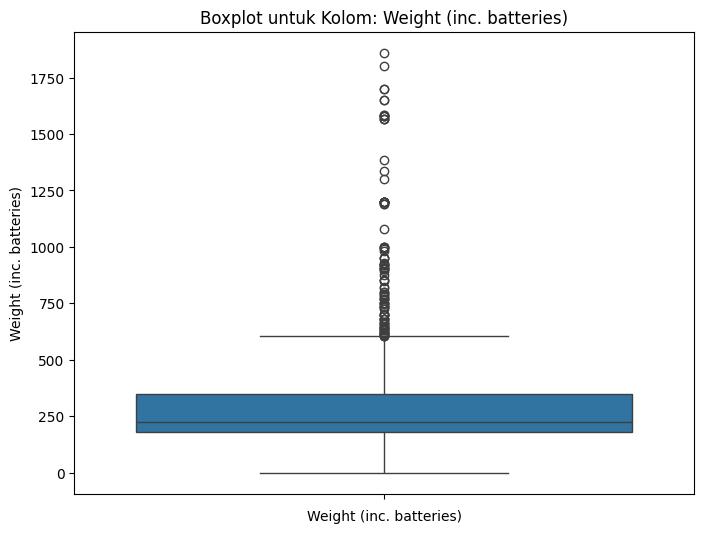

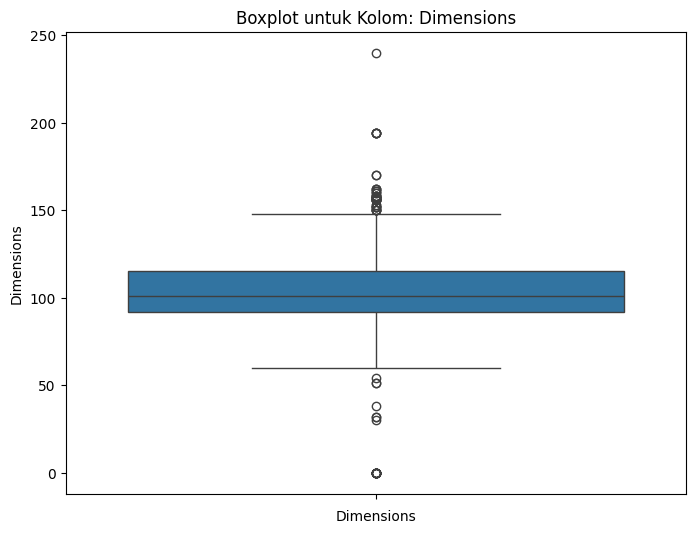

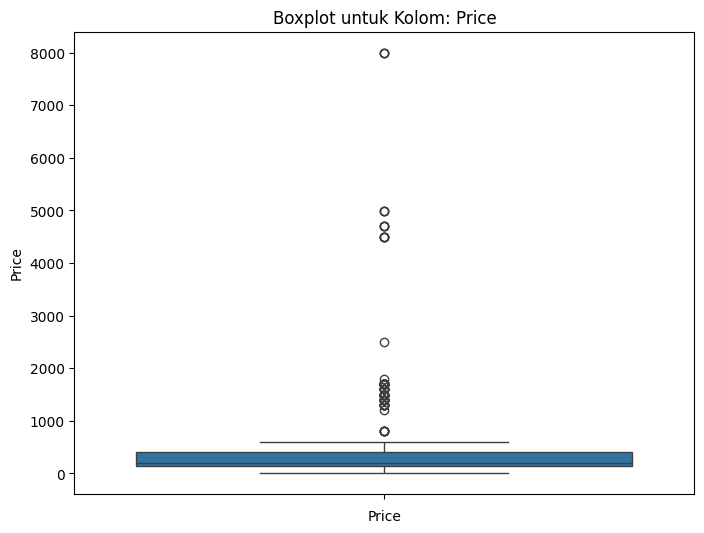

In [9]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Loop untuk membuat boxplot setiap kolom numerik
for col in numerical_columns:
    plt.figure(figsize=(8, 6))  # Ukuran gambar untuk setiap boxplot
    sns.boxplot(y=data[col])  # Membuat boxplot untuk kolom
    plt.title(f'Boxplot untuk Kolom: {col}')  # Memberikan judul boxplot sesuai nama kolom
    plt.xlabel(col)  # Label untuk sumbu x
    plt.show()  # Menampilkan boxplot

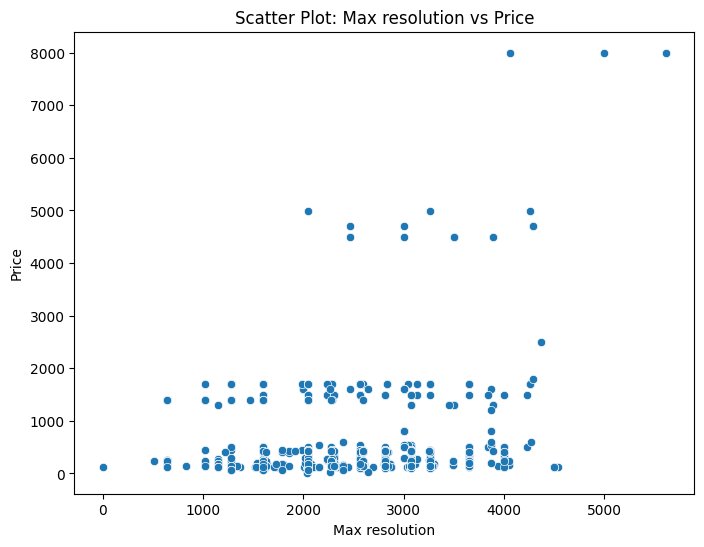

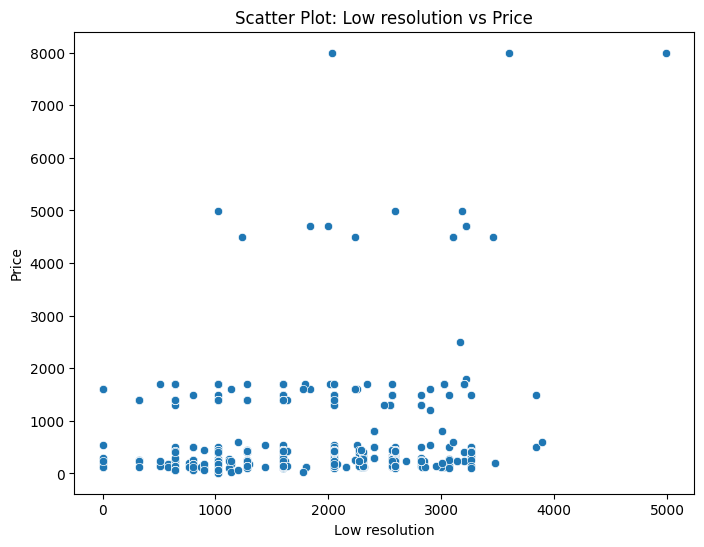

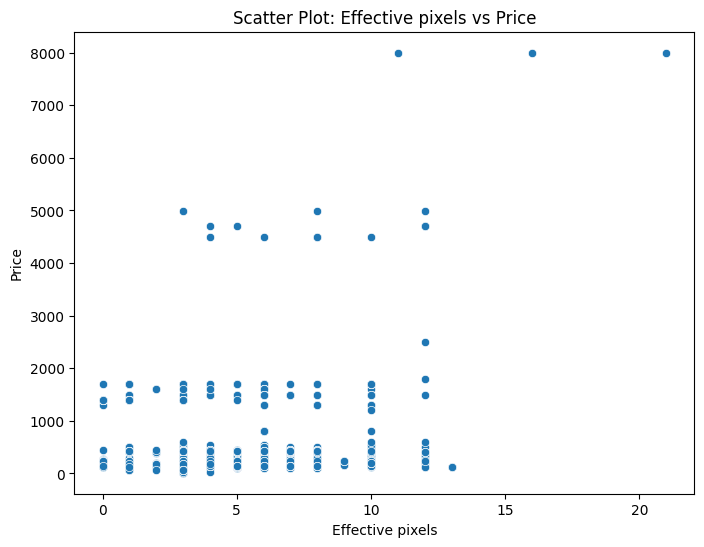

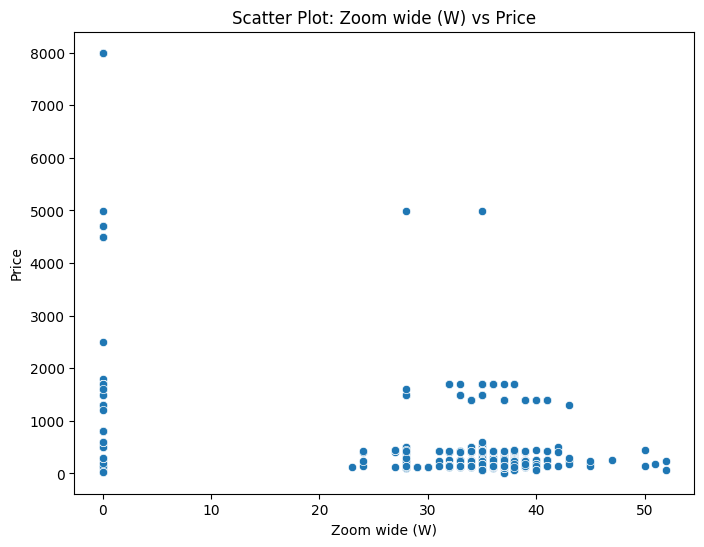

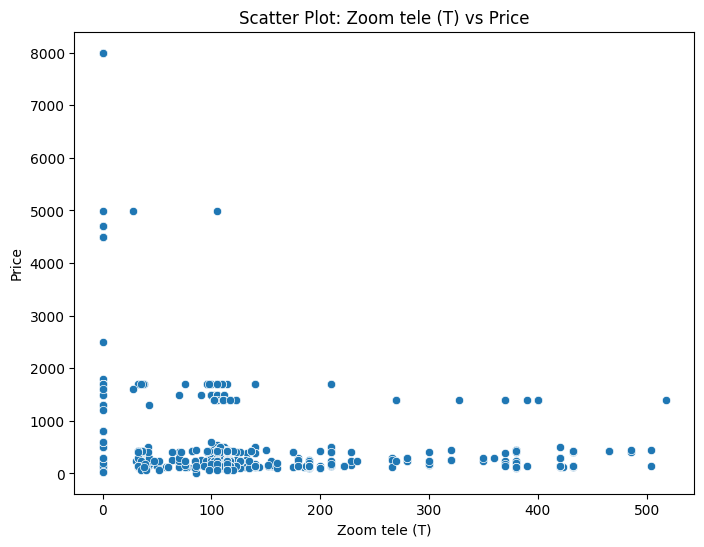

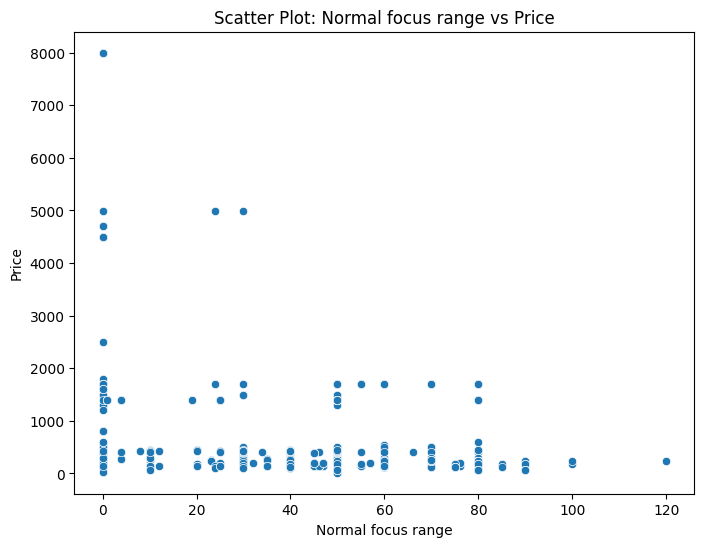

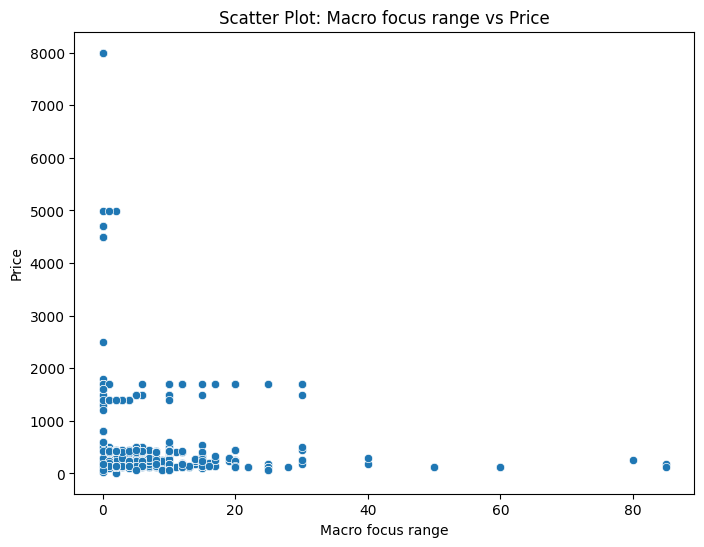

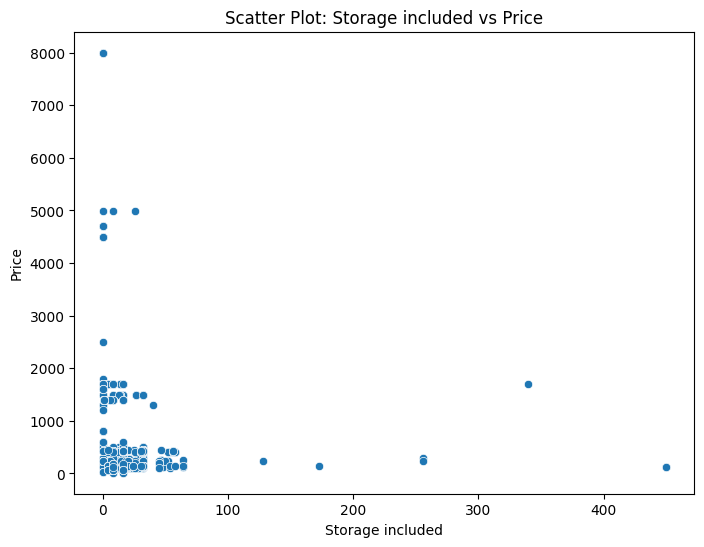

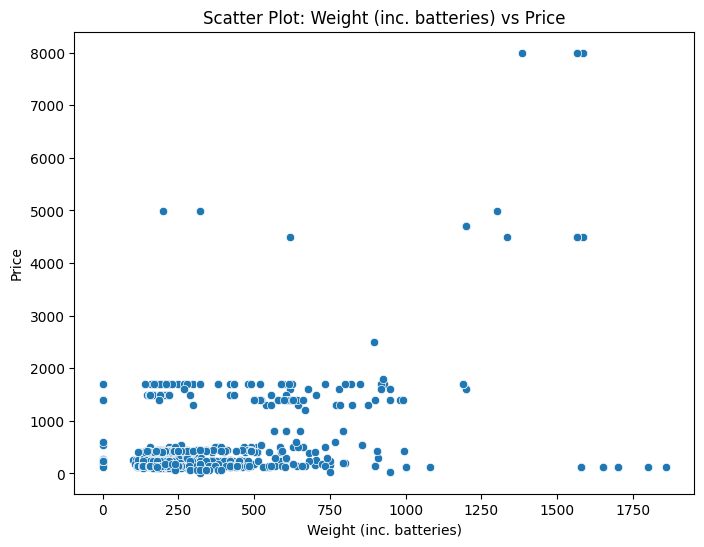

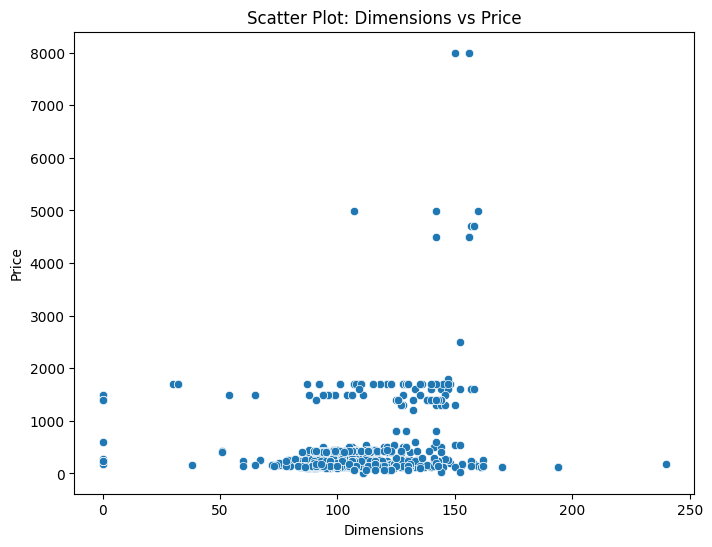

In [10]:
# Loop untuk membuat scatter plot antara setiap kolom dan 'Price'
for col in numerical_columns:
    if col != 'Price':  # Menghindari pembuatan plot dengan Price terhadap dirinya sendiri
        plt.figure(figsize=(8, 6))  # Ukuran gambar untuk setiap scatter plot
        sns.scatterplot(x=data[col], y=data['Price'])  # Scatter plot kolom terhadap Price
        plt.title(f'Scatter Plot: {col} vs Price')  # Memberikan judul plot sesuai nama kolom
        plt.xlabel(col)  # Label untuk sumbu X
        plt.ylabel('Price')  # Label untuk sumbu Y
        plt.show()  # Menampilkan scatter plot

In [11]:
# Hitung z-score untuk setiap kolom numerik
z_scores = np.abs(zscore(data.select_dtypes(include=['int64', 'float64'])))

# Threshold z-score > 3 dianggap outlier
outlier_indices = np.where(z_scores > 3)

# Menampilkan hasil
print("Indeks dan kolom dengan outlier (Z-Score > 3):")
for i, col in zip(outlier_indices[0], outlier_indices[1]):
    print(f"Baris: {i}, Kolom: {data.columns[col]}, Nilai: {data.iloc[i, col]}")

Indeks dan kolom dengan outlier (Z-Score > 3):
Baris: 47, Kolom: Low resolution, Nilai: 2048.0
Baris: 48, Kolom: Low resolution, Nilai: 1232.0
Baris: 48, Kolom: Weight (inc. batteries), Nilai: 1585.0
Baris: 49, Kolom: Low resolution, Nilai: 3104.0
Baris: 49, Kolom: Weight (inc. batteries), Nilai: 1565.0
Baris: 50, Kolom: Low resolution, Nilai: 3456.0
Baris: 50, Kolom: Weight (inc. batteries), Nilai: 1335.0
Baris: 51, Kolom: Low resolution, Nilai: 3104.0
Baris: 51, Kolom: Weight (inc. batteries), Nilai: 1565.0
Baris: 52, Kolom: Low resolution, Nilai: 2032.0
Baris: 52, Kolom: Weight (inc. batteries), Nilai: 1585.0
Baris: 53, Kolom: Model, Nilai: Canon
Baris: 53, Kolom: Max resolution, Nilai: 4992.0
Baris: 53, Kolom: Low resolution, Nilai: 3600.0
Baris: 53, Kolom: Weight (inc. batteries), Nilai: 1565.0
Baris: 54, Kolom: Model, Nilai: Canon
Baris: 54, Kolom: Release date, Nilai: 2007
Baris: 54, Kolom: Max resolution, Nilai: 5616.0
Baris: 54, Kolom: Low resolution, Nilai: 4992.0
Baris: 54, 

In [12]:
# Menggabungkan semua indeks baris outlier
outlier_rows = np.unique(outlier_indices[0])

# Menghapus baris yang termasuk dalam outlier_rows
data2 = data.drop(index=outlier_rows)

# Menampilkan informasi dataset sebelum dan sesudah
print("Dataset asli:")
print(data.shape)
print("\nDataset setelah menghapus outlier:")
print(data2.shape)

Dataset asli:
(1038, 13)

Dataset setelah menghapus outlier:
(919, 13)


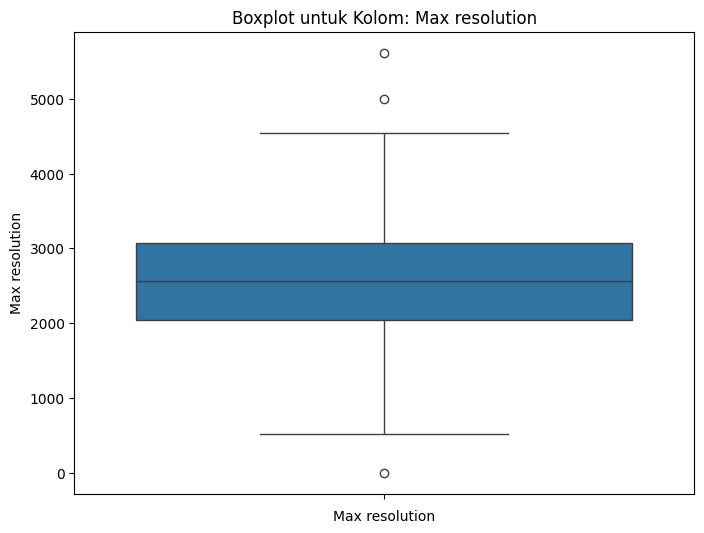

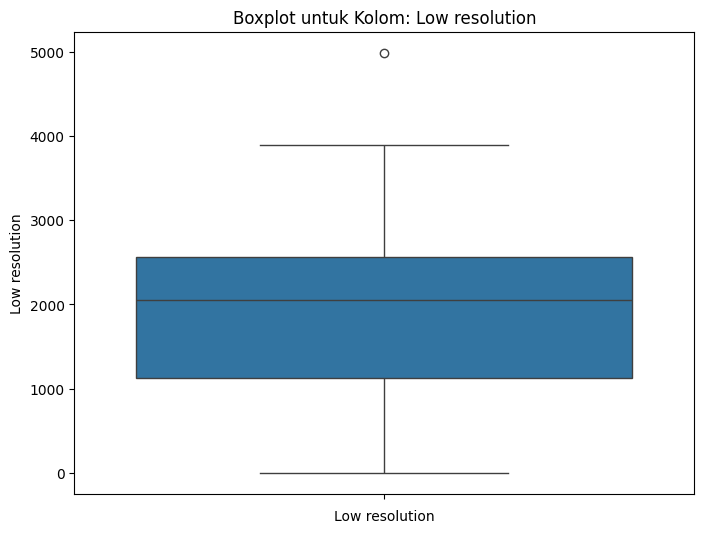

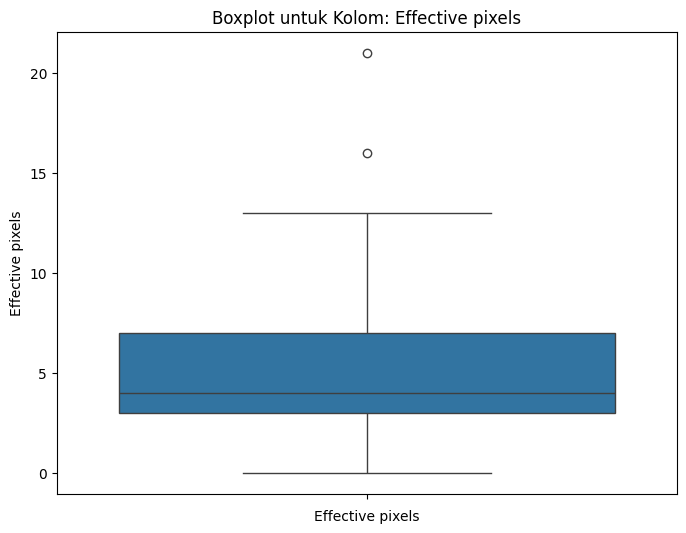

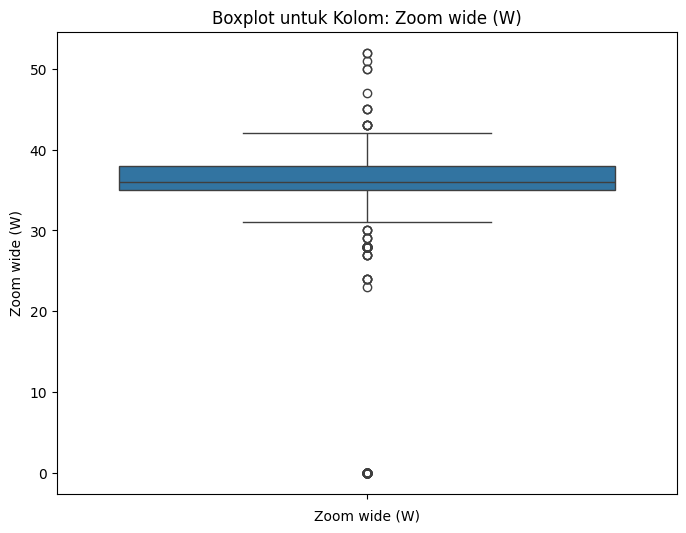

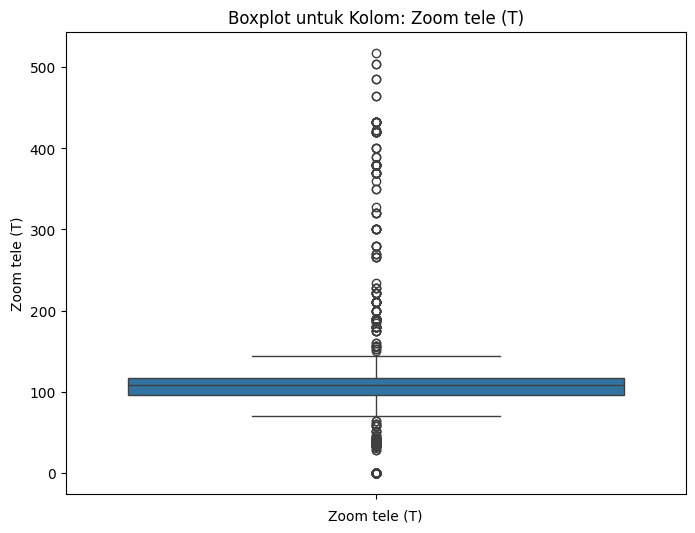

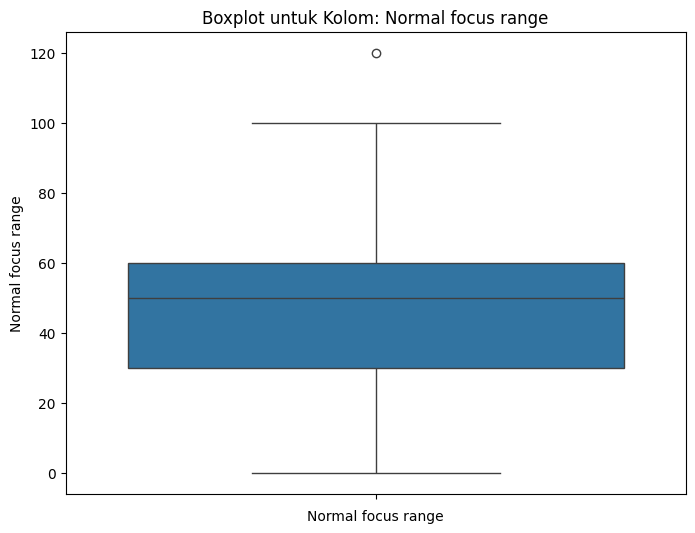

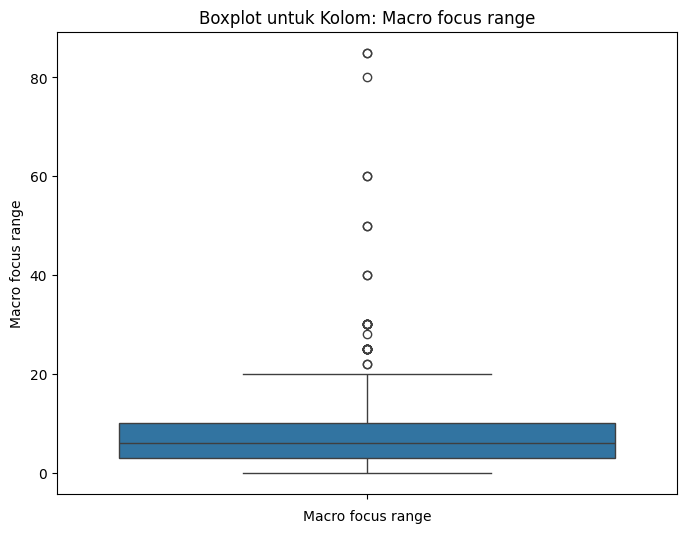

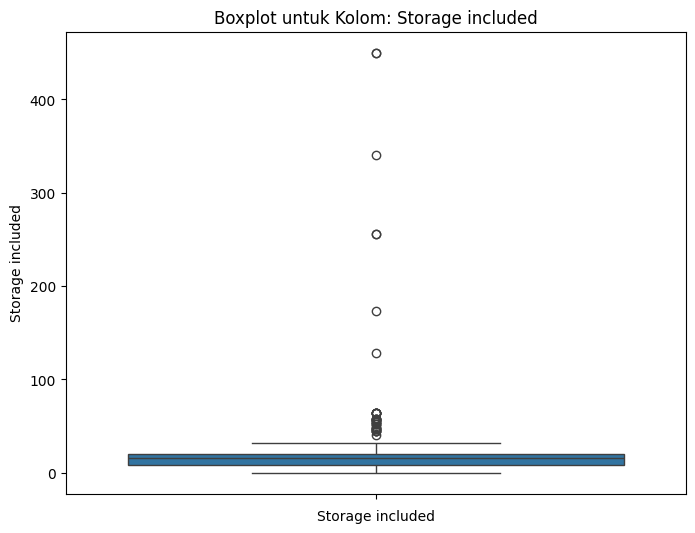

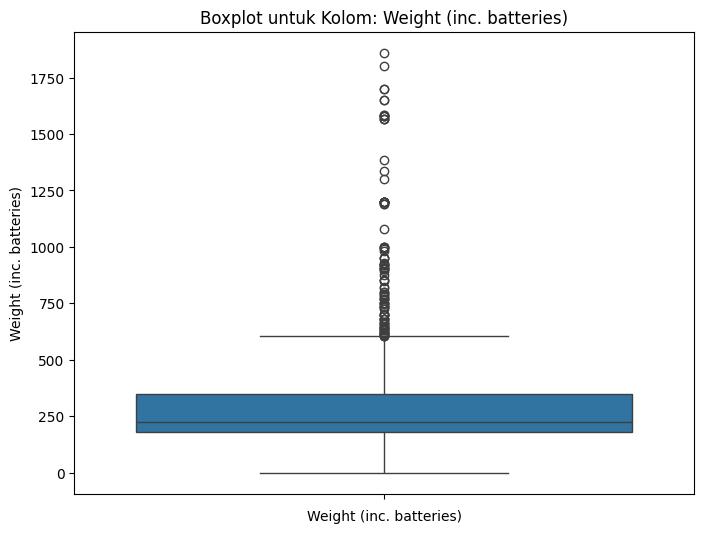

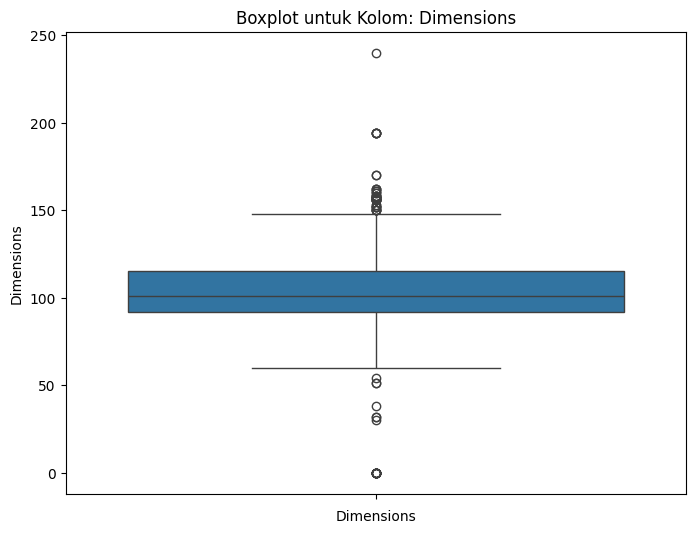

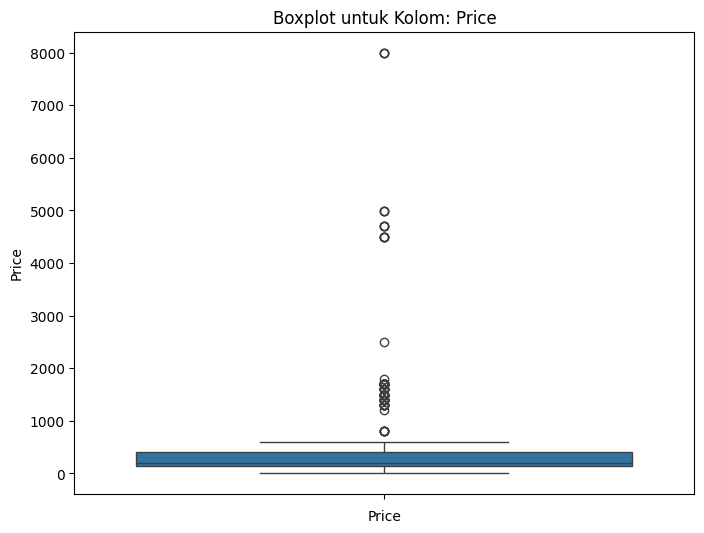

In [13]:
numerical_columns2 = data2.select_dtypes(include=['float64', 'int64']).columns

# Loop untuk membuat boxplot setiap kolom numerik
for col in numerical_columns2:
    plt.figure(figsize=(8, 6))  # Ukuran gambar untuk setiap boxplot
    sns.boxplot(y=data[col])  # Membuat boxplot untuk kolom
    plt.title(f'Boxplot untuk Kolom: {col}')  # Memberikan judul boxplot sesuai nama kolom
    plt.xlabel(col)  # Label untuk sumbu x
    plt.show()  # Menampilkan boxplot

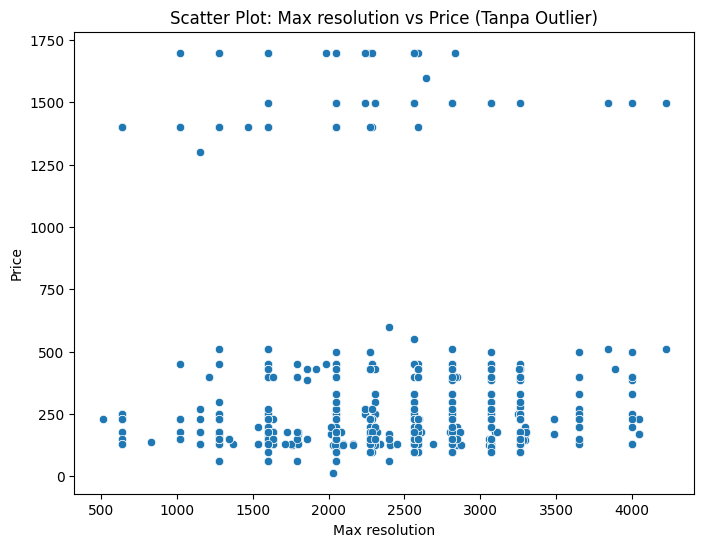

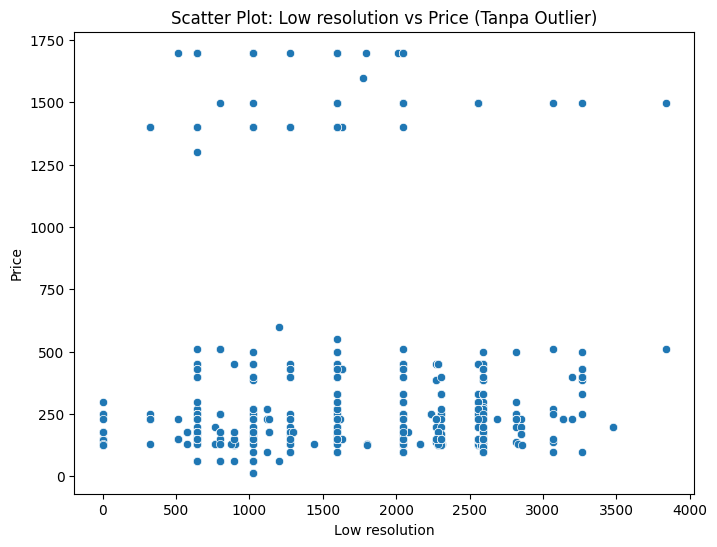

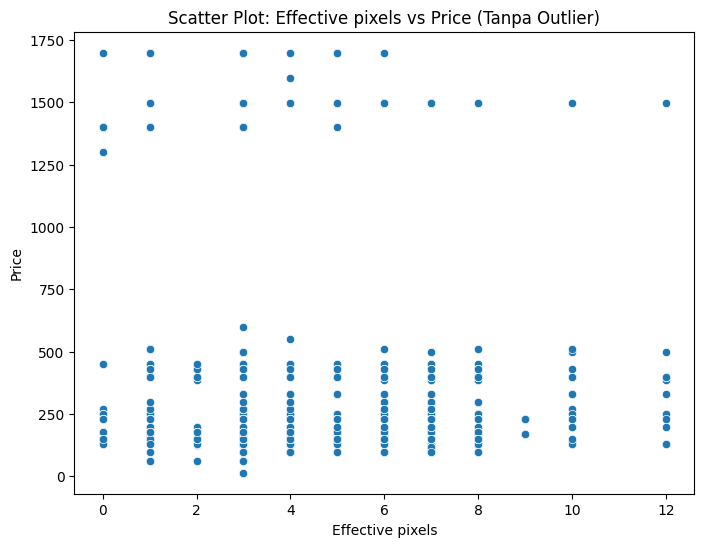

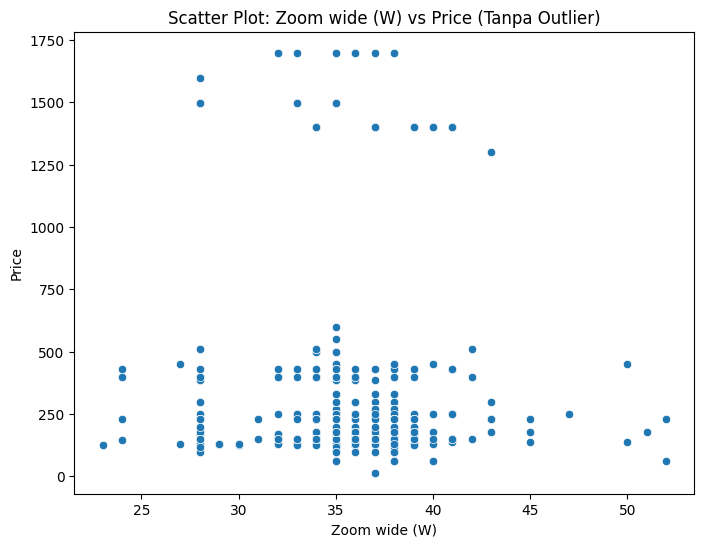

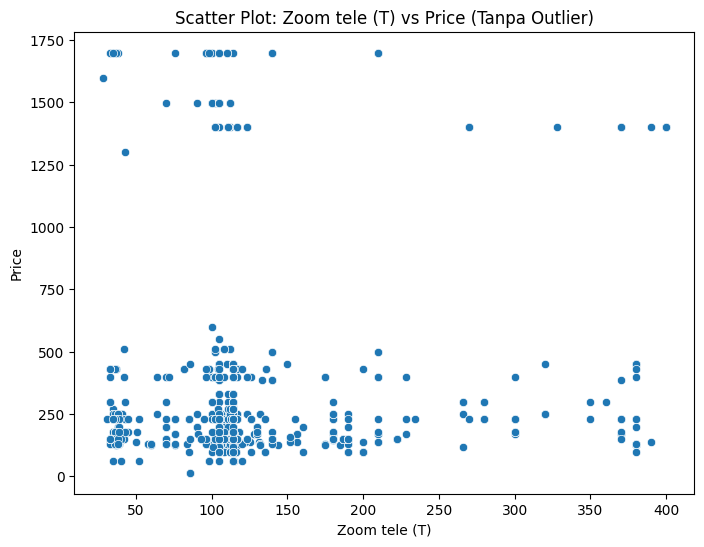

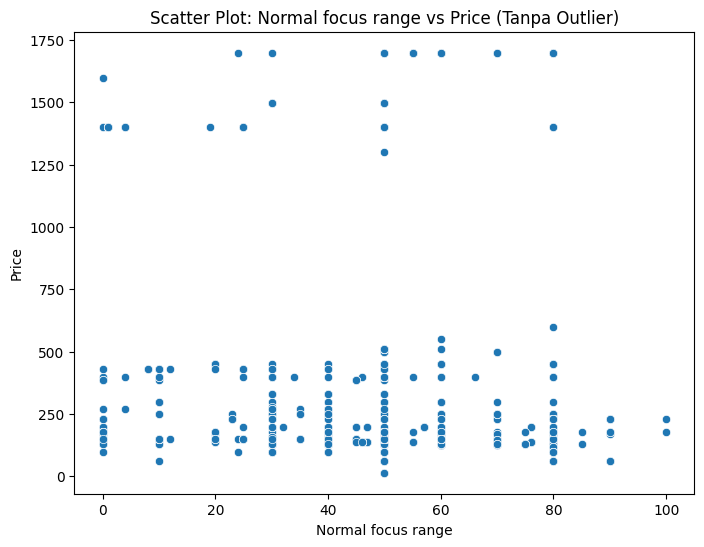

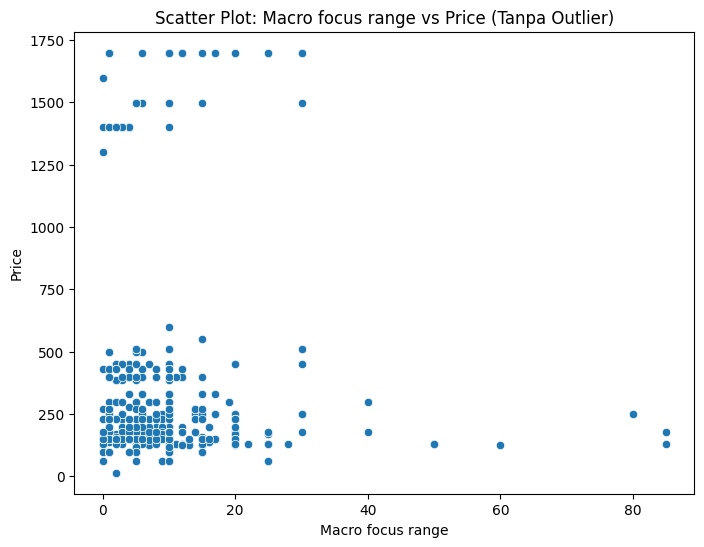

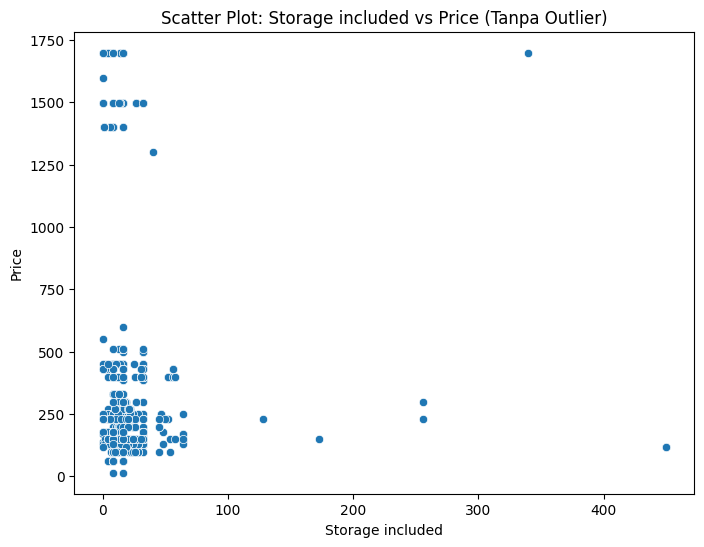

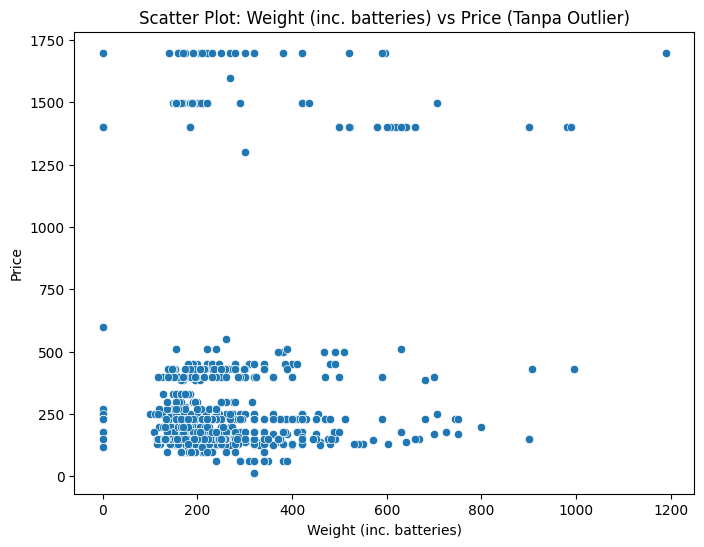

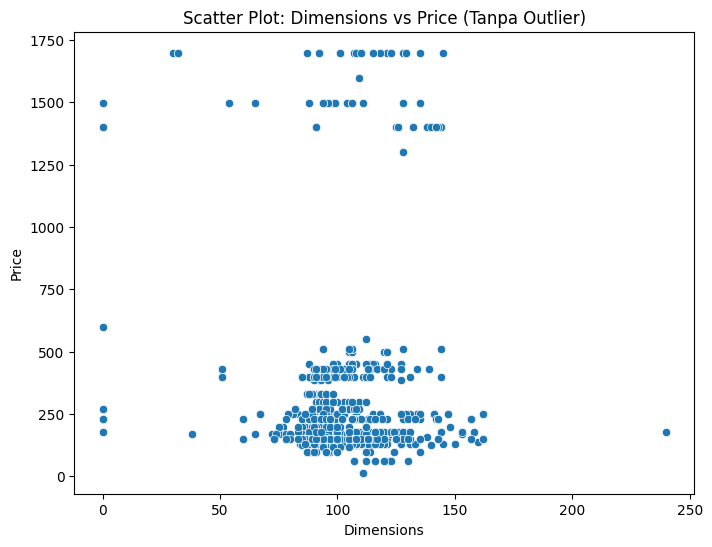

In [14]:
#scatter plot antara setiap kolom dan 'Price'
for col in numerical_columns2:
    if col != 'Price':  # Menghindari pembuatan plot antara Price dengan dirinya sendiri
        plt.figure(figsize=(8, 6))  # Ukuran gambar untuk setiap scatter plot
        sns.scatterplot(x=data2[col], y=data2['Price'])  # Scatter plot kolom terhadap Price
        plt.title(f'Scatter Plot: {col} vs Price (Tanpa Outlier)')  # Memberikan judul plot sesuai nama kolom
        plt.xlabel(col)  # Label untuk sumbu X
        plt.ylabel('Price')  # Label untuk sumbu Y
        plt.show()  # Menampilkan scatter plot

## MENGISI NILAI YANG KOSONG

In [15]:
#cek nilai yang kosong pada dataset
def cek_nilai_kosong(dataset):
  for col in dataset.columns:
      nan_count = dataset[col].isna().sum()
      print(f"Kolom '{col}' memiliki {nan_count} nilai kosong.")

#cek nilai 0 pada dataset
def cek_nilai_0(dataset):
  for col in dataset.columns:
      zero_count = (dataset[col] == 0).sum()
      print(f"Kolom '{col}' memiliki {zero_count} nilai 0.")

cek_nilai_kosong(data)
cek_nilai_0(data)

Kolom 'Model' memiliki 0 nilai kosong.
Kolom 'Release date' memiliki 0 nilai kosong.
Kolom 'Max resolution' memiliki 0 nilai kosong.
Kolom 'Low resolution' memiliki 0 nilai kosong.
Kolom 'Effective pixels' memiliki 0 nilai kosong.
Kolom 'Zoom wide (W)' memiliki 0 nilai kosong.
Kolom 'Zoom tele (T)' memiliki 0 nilai kosong.
Kolom 'Normal focus range' memiliki 0 nilai kosong.
Kolom 'Macro focus range' memiliki 1 nilai kosong.
Kolom 'Storage included' memiliki 2 nilai kosong.
Kolom 'Weight (inc. batteries)' memiliki 2 nilai kosong.
Kolom 'Dimensions' memiliki 2 nilai kosong.
Kolom 'Price' memiliki 0 nilai kosong.
Kolom 'Model' memiliki 0 nilai 0.
Kolom 'Release date' memiliki 0 nilai 0.
Kolom 'Max resolution' memiliki 1 nilai 0.
Kolom 'Low resolution' memiliki 54 nilai 0.
Kolom 'Effective pixels' memiliki 35 nilai 0.
Kolom 'Zoom wide (W)' memiliki 85 nilai 0.
Kolom 'Zoom tele (T)' memiliki 85 nilai 0.
Kolom 'Normal focus range' memiliki 137 nilai 0.
Kolom 'Macro focus range' memiliki 127 

In [16]:
#mengganti value kosong pada kolom dengan mean
def replace_null_with_mean(column):
    # Hitung mean dengan mengabaikan 0 dan NaN
    mean_value = column[column != 0].dropna().mean()
    # Ganti nilai 0 dan NaN dengan mean
    return column.replace(np.nan).fillna(mean_value)

for col in data2.columns:
    if pd.api.types.is_numeric_dtype(data2[col]):
        data2[col] = replace_null_with_mean(data2[col])
    else:
        print(f"Kolom '{col}' bukan tipe numerik, dilewati.")

cek_nilai_kosong(data2)

Kolom 'Model' bukan tipe numerik, dilewati.
Kolom 'Release date' bukan tipe numerik, dilewati.
Kolom 'Model' memiliki 0 nilai kosong.
Kolom 'Release date' memiliki 0 nilai kosong.
Kolom 'Max resolution' memiliki 0 nilai kosong.
Kolom 'Low resolution' memiliki 0 nilai kosong.
Kolom 'Effective pixels' memiliki 0 nilai kosong.
Kolom 'Zoom wide (W)' memiliki 0 nilai kosong.
Kolom 'Zoom tele (T)' memiliki 0 nilai kosong.
Kolom 'Normal focus range' memiliki 0 nilai kosong.
Kolom 'Macro focus range' memiliki 0 nilai kosong.
Kolom 'Storage included' memiliki 0 nilai kosong.
Kolom 'Weight (inc. batteries)' memiliki 0 nilai kosong.
Kolom 'Dimensions' memiliki 0 nilai kosong.
Kolom 'Price' memiliki 0 nilai kosong.


<ipython-input-16-44e142f3f076>:6: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  return column.replace(np.nan).fillna(mean_value)


In [17]:
#mengganti value 0 pada kolom dengan mean
def replace_0_with_mean(column):
    # Hitung mean dengan mengabaikan 0 dan NaN
    mean_value = column[column != 0].dropna().mean()
    # Ganti nilai 0 dan NaN dengan mean
    return column.replace(0).fillna(mean_value)

data2["Weight (inc. batteries)"] = replace_0_with_mean(data2["Weight (inc. batteries)"])
data2["Dimensions"] = replace_0_with_mean(data2["Dimensions"])

<ipython-input-17-8298b372da92>:6: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  return column.replace(0).fillna(mean_value)


## VISUALISASI PERBANDINGAN DATASET

In [18]:
data2.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,420.0,158.0,179.0
3,Agfa,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,420.0,158.0,269.0
4,Agfa,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


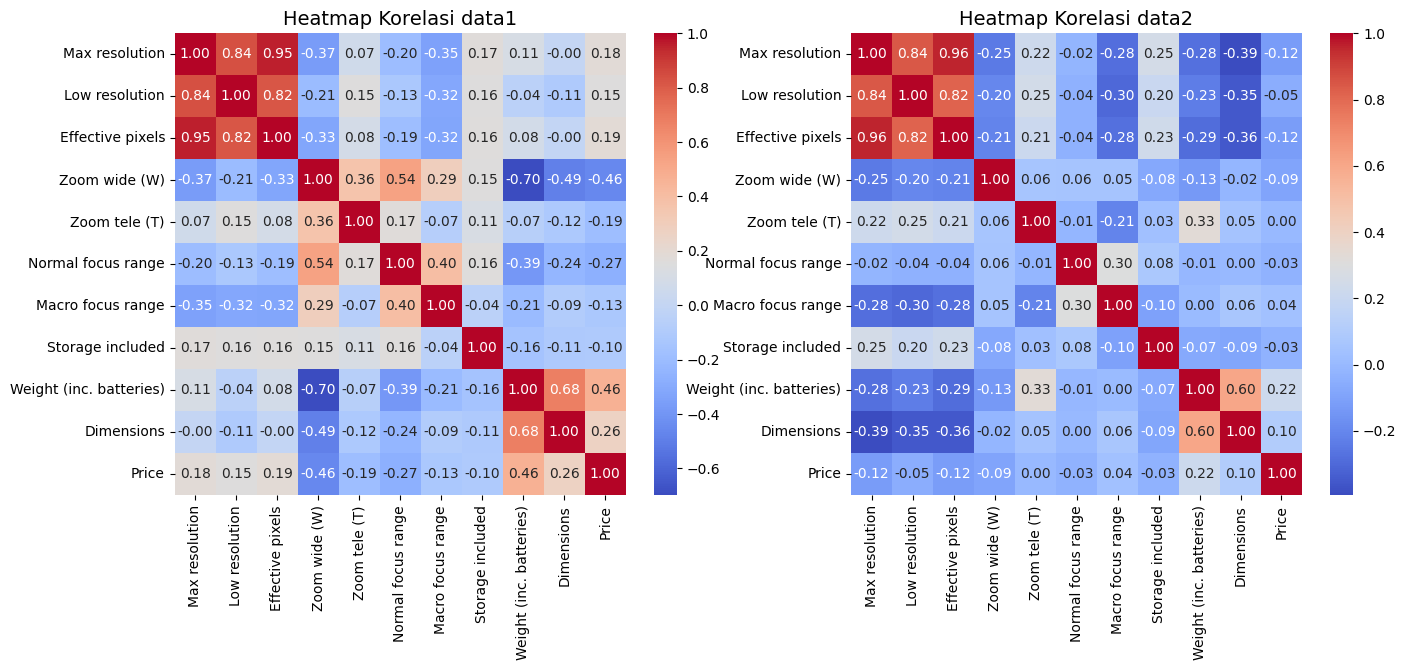

In [19]:
data_numeric1 = data.select_dtypes(include=['int64', 'float64'])
data_numeric2 = data2.select_dtypes(include=['int64', 'float64'])

# Membuat matriks korelasi
correlation_matrix1 = data_numeric1.corr()
correlation_matrix2 = data_numeric2.corr()

# Membuat heatmap untuk visualisasi
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(correlation_matrix1, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, ax=axes[0])
axes[0].set_title("Heatmap Korelasi data1", fontsize=14)

sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, ax=axes[1])
axes[1].set_title("Heatmap Korelasi data2", fontsize=14)

plt.show()

<ipython-input-20-b32699459e0d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_price1.index, y=correlations_with_price1.values, palette='coolwarm',ax=axes[0])
<ipython-input-20-b32699459e0d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_price2.index, y=correlations_with_price2.values, palette='coolwarm',ax=axes[1])


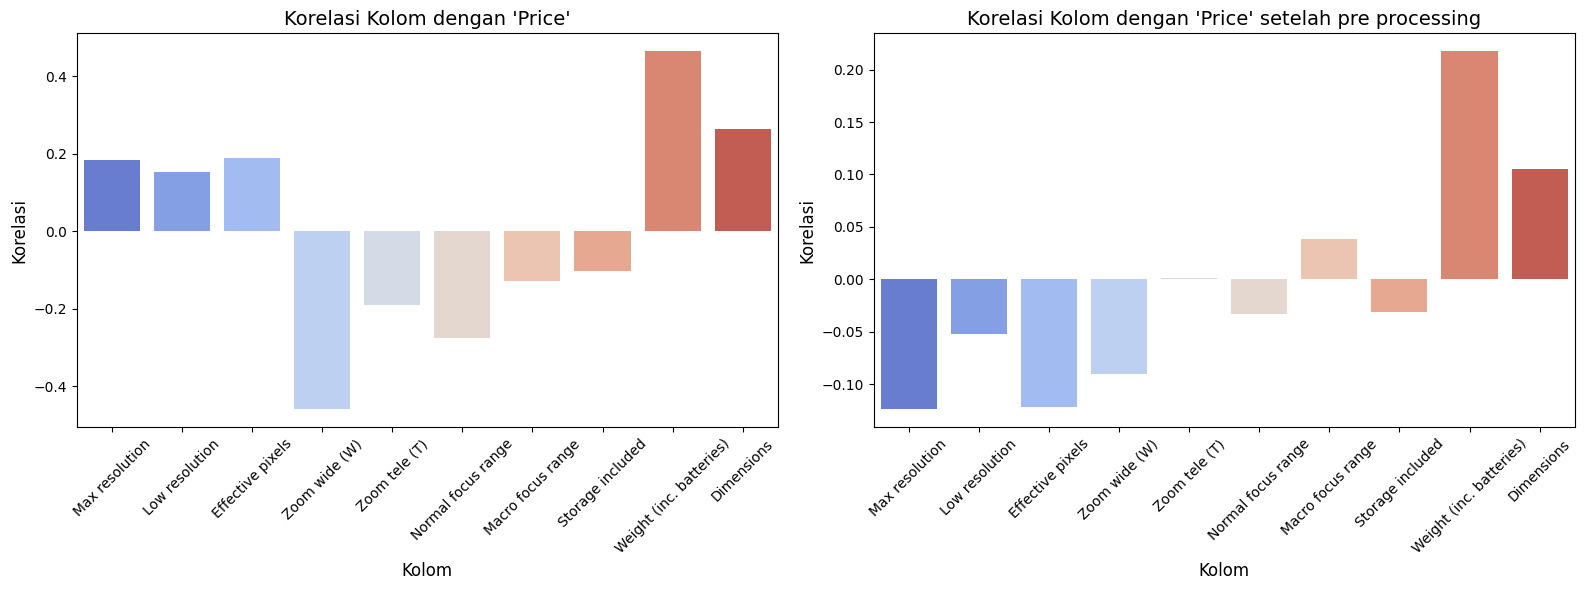

In [20]:
data_numeric1 = data.select_dtypes(include=['int64', 'float64'])
data_numeric2 = data2.select_dtypes(include=['int64', 'float64'])

correlations_with_price1 = data_numeric1.corr()['Price'].drop('Price')
correlations_with_price2 = data_numeric2.corr()['Price'].drop('Price')

# Membuat bar plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=correlations_with_price1.index, y=correlations_with_price1.values, palette='coolwarm',ax=axes[0])
axes[0].set_title("Korelasi Kolom dengan 'Price'", fontsize=14)
axes[0].set_ylabel("Korelasi", fontsize=12)
axes[0].set_xlabel("Kolom", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=correlations_with_price2.index, y=correlations_with_price2.values, palette='coolwarm',ax=axes[1])
axes[1].set_title("Korelasi Kolom dengan 'Price' setelah pre processing", fontsize=14)
axes[1].set_ylabel("Korelasi", fontsize=12)
axes[1].set_xlabel("Kolom", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
# Menampilkan plot
plt.tight_layout()
plt.show()

# TRAINING MODEL

In [21]:
# Fitur (X) dan Target (y)
X = data2[['Model','Release date',	'Max resolution',	'Low resolution',	'Effective pixels',	'Zoom wide (W)',	'Zoom tele (T)',	'Normal focus range',	'Macro focus range',	'Storage included',	'Weight (inc. batteries)',	'Dimensions']]
y = data2['Price']

# Encoding kolom kategorikal
label_encoder = LabelEncoder()
X['Model'] = label_encoder.fit_transform(X['Model'])
X['Release date'] = label_encoder.fit_transform(X['Release date'])
X.head()

<ipython-input-21-c0f9ee187712>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Model'] = label_encoder.fit_transform(X['Model'])
<ipython-input-21-c0f9ee187712>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Release date'] = label_encoder.fit_transform(X['Release date'])


,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions
0,0,1,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0
1,0,2,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0
2,0,4,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,420.0,158.0
3,0,3,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,420.0,158.0
4,0,3,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0


In [22]:
# Fungsi untuk menghitung entropi
def calculate_entropy(column):
    counts = column.value_counts()
    probabilities = counts / len(column)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Kalkulasi entropi dari kolom (is_safe)
target_entropy = calculate_entropy(data2['Price'])
target_entropy

4.349795815173437

In [23]:
# Membagi data menjadi pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Save the trained model to a file
model_file = 'camera_price_model.pkl'
with open(model_file, 'wb') as f:
    pickle.dump(model, f)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1819.1386244444461
Root Mean Squared Error (RMSE): 42.65136134339027
R-squared (R²): 0.9911957708827058


                    Feature  Importance
0                     Model    0.315232
6             Zoom tele (T)    0.170355
10  Weight (inc. batteries)    0.146124
11               Dimensions    0.093838
9          Storage included    0.050803
8         Macro focus range    0.047722
3            Low resolution    0.046576
2            Max resolution    0.036136
1              Release date    0.029948
7        Normal focus range    0.025738
5             Zoom wide (W)    0.025300
4          Effective pixels    0.012228


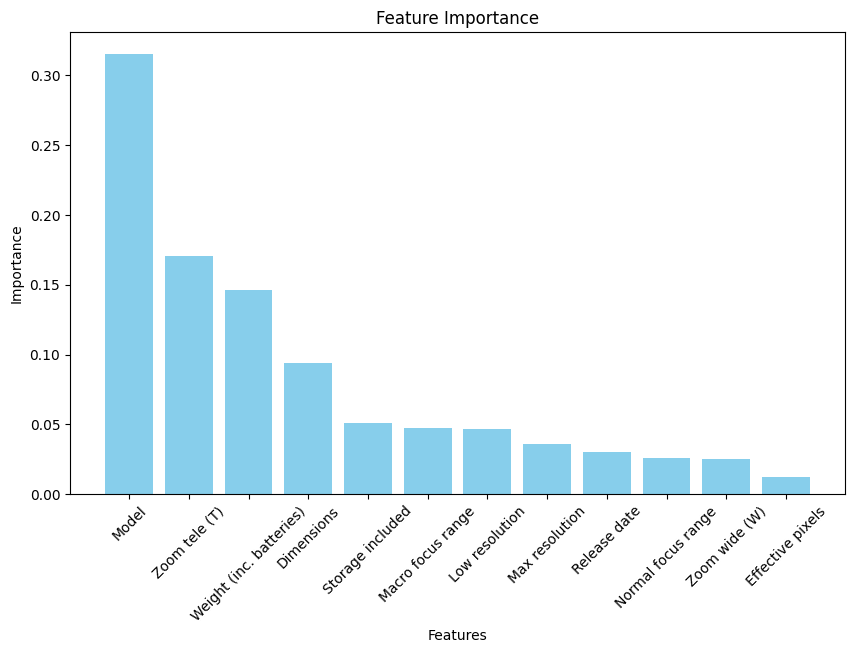

In [24]:
# Melatih model Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Mengambil feature importance
importance = rf.feature_importances_

# Membuat DataFrame untuk feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Menampilkan tabel feature importance
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# PENGAPLIKASIAN MODEL

In [25]:
# 1. Muat Model yang Sudah Dilatih
model = joblib.load('camera_price_model.pkl')

# 2. Input Data Laptop Baru untuk Prediksi
new_laptop_data = pd.DataFrame([{
    'Model': '0',
    'Release date': '1',
    'Max resolution': 1024,
    'Low resolution': 640,
    'Effective pixels': 0,
    'Zoom wide (W)': 38,
    'Zoom tele (T)': 114,
    'Normal focus range': 70,
    'Macro focus range': 40,
    'Storage included': 4,
    'Weight (inc. batteries)': 420,
    'Dimensions': 95,
}])

# 3. Prediksi Harga Laptop
predicted_price = model.predict(new_laptop_data)
predicted_price_rupiah = predicted_price*16750
# 4. Tampilkan Hasil Prediksi
print(f"Predicted Price: {predicted_price[0]:.2f} euro")
print(f"Predicted Price: {predicted_price_rupiah[0]:.2f} rupiah")

Predicted Price: 206.40 euro
Predicted Price: 3457200.00 rupiah


In [27]:
data2.to_csv('dataset_setelah_preprocessing.csv', index=False)